#IMPORTING LIBRARIES


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("/content/concrete_dataas.csv")

#DATA UNDERSTANDING


Exploratory Data Analysis

In [ ]:
df.shape

(1030, 9)

In [ ]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
#checking for null values
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [ ]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [ ]:
df.duplicated().sum()

25

In [ ]:
dropped=df.drop_duplicates(inplace = True)


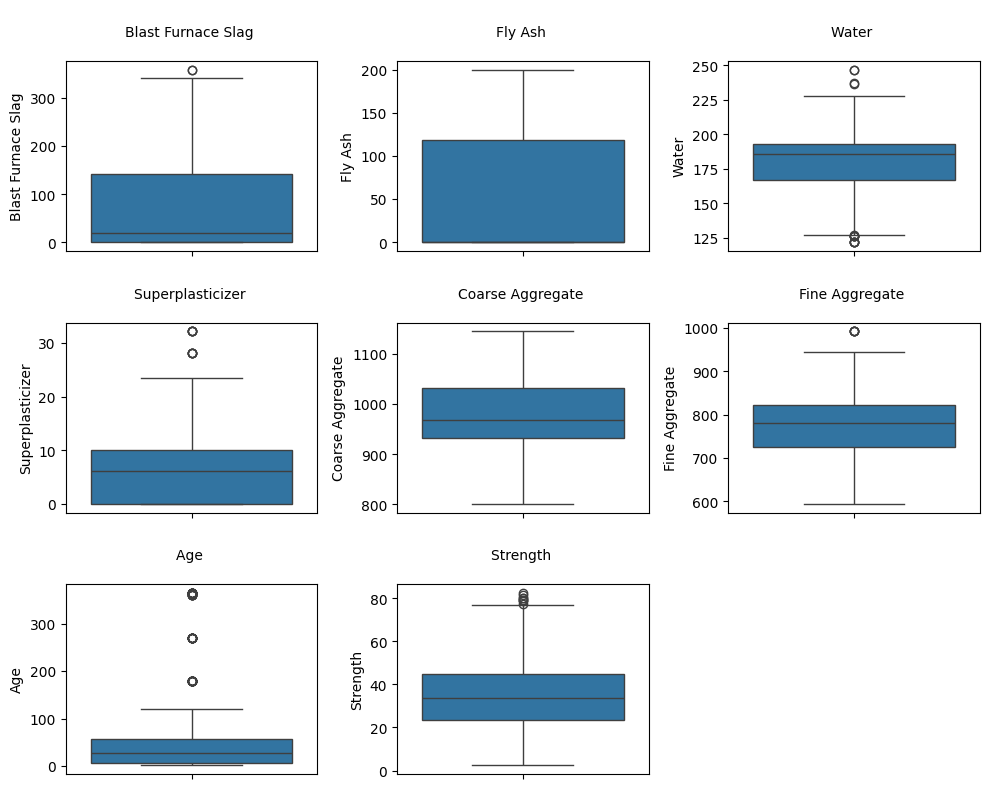

In [ ]:
# checking for outliers

variables = df.columns

plt.figure(figsize = (10, 8))
plotnumber = 1

for i in range(1, len(variables)):
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.boxplot(y = variables[i], data = df, ax = ax)
        plt.title(f"\n{variables[i]} \n", fontsize = 10)

    plotnumber += 1

plt.tight_layout()
plt.show()

In [ ]:
#Treating the Outliers
from scipy.stats.mstats import winsorize
cols='Water','Age','Superplasticizer'
for column in cols:
    df[column] = winsorize(df[column], limits=[0.05, 0.05])

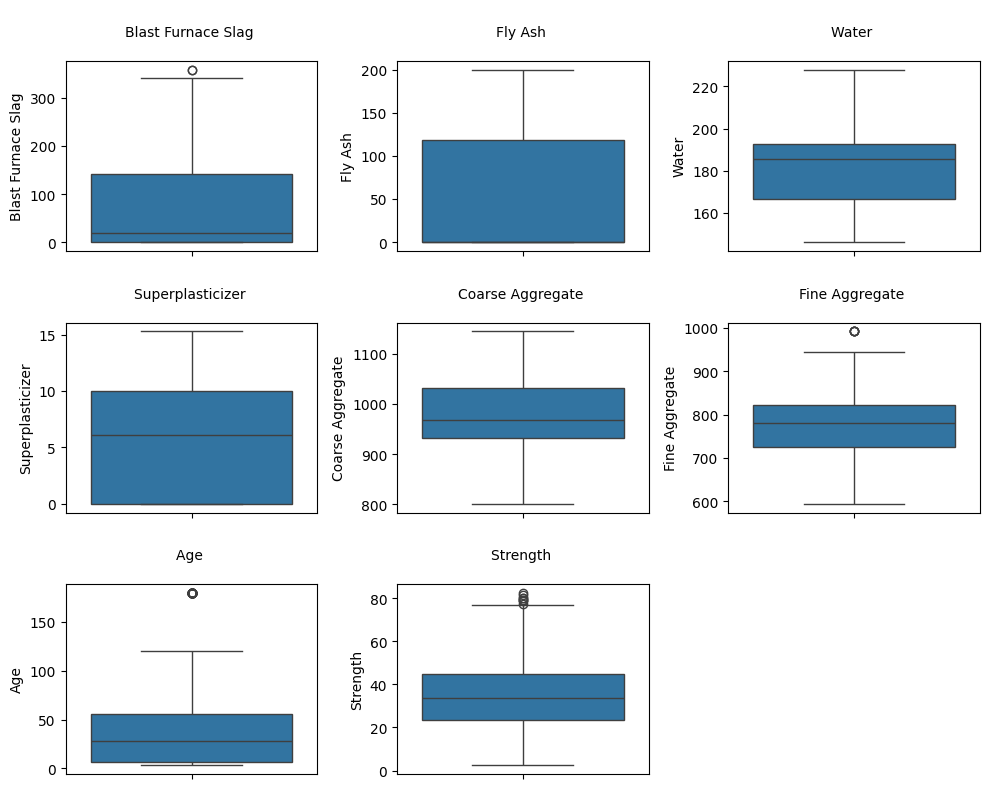

In [ ]:
# rechecking for the otliers

plt.figure(figsize = (10, 8))
plotnumber = 1

for i in range(1, len(variables)):
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.boxplot(y = variables[i], data = df, ax = ax)
        plt.title(f"\n{variables[i]} \n", fontsize = 10)

    plotnumber += 1

plt.tight_layout()
plt.show()

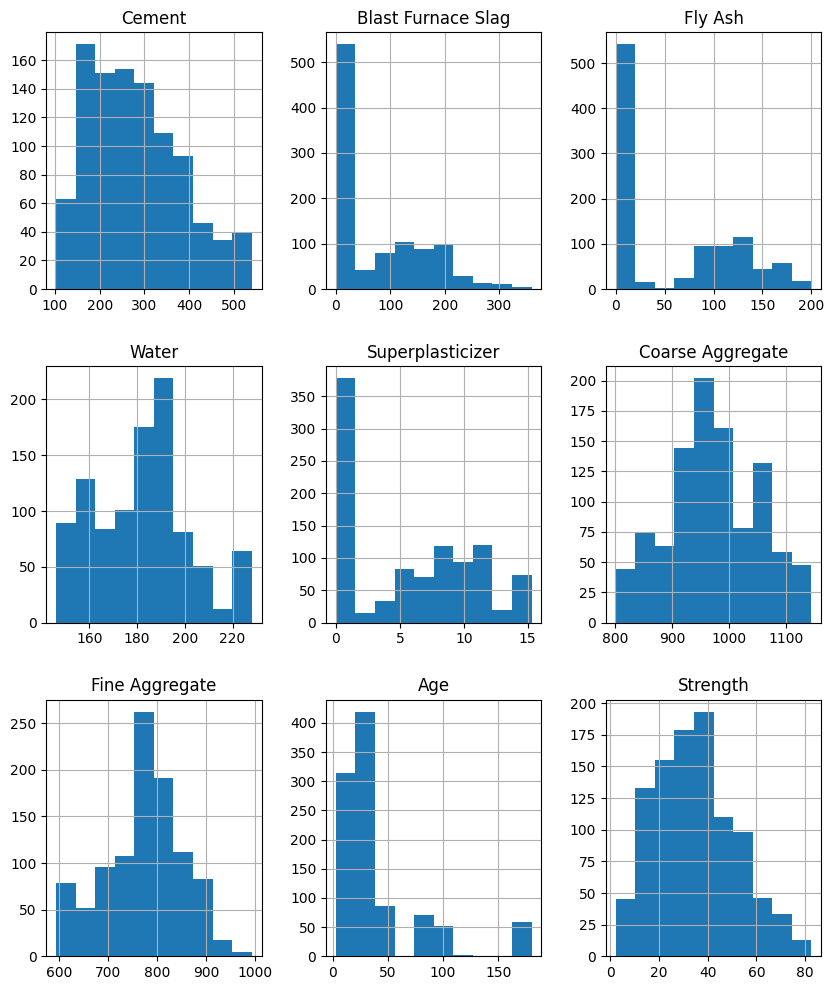

In [ ]:
histogram = df.hist(figsize = (10, 12))

Cement:

The distribution is right-skewed with a concentration between 100 and 300.
There are fewer instances of higher cement amounts.

Blast Furnace Slag:

Highly right-skewed with a significant number of instances at 0.
Very few instances of high values, indicating many samples do not use blast furnace slag.

Fly Ash:

Similar to Blast Furnace Slag, highly right-skewed with many instances at 0.
Indicates many samples do not contain fly ash.

Water:

Slightly left-skewed with a concentration around 180-220.
Most samples have a consistent amount of water.
Superplasticizer:

Highly right-skewed with a significant number of instances at 0.
Few samples use high amounts of superplasticizer.

Coarse Aggregate:

Fairly normally distributed with a peak around 1000.

Fine Aggregate:

Distribution is slightly left-skewed with a peak around 800.

Age:

Highly right-skewed with many samples aged 0-50 days.
Few instances of high age values.

Strength:

Appears normally distributed with a peak around 20-40.

CORRELATION

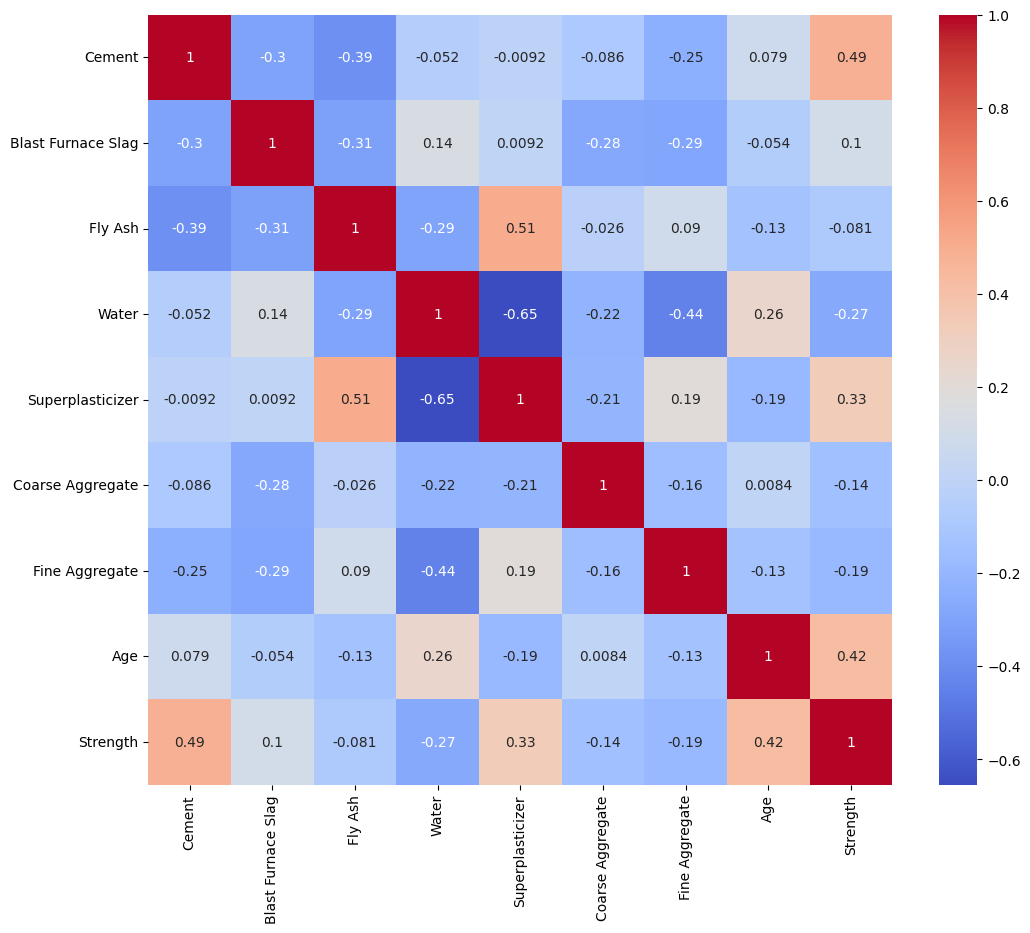

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


Cement and Strength:

There is a positive correlation (0.49) between Cement and Strength, indicating that as the amount of cement increases, the strength of the concrete also tends to increase.

Age and Strength:

Age has a positive correlation (0.42) with Strength, suggesting that the strength of the concrete increases as it ages.

Superplasticizer and Strength:

There is a moderate positive correlation (0.33) between Superplasticizer and Strength, indicating that using superplasticizers can improve the strength of the concrete.

Water and Strength:

There is a negative correlation (-0.27) between Water and Strength, which means that as the amount of water increases, the strength of the concrete tends to decrease.

Fly Ash and Strength:

Fly Ash shows a weak negative correlation (-0.081) with Strength.

Other Ingredients and Strength:

Blast Furnace Slag (0.1), Coarse Aggregate (-0.14), and Fine Aggregate (-0.19) show weaker correlations with Strength.

#TRAIN TEST SPLIT

In [ ]:
x = df.drop(['Strength'], axis=1)

y = df['Strength']

In [ ]:
print(x.shape)
print(y.shape)

(1005, 8)
(1005,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25,random_state=9)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(753, 8)
(252, 8)
(753,)
(252,)


In [ ]:
skewness=X_train.skew()
print(skewness)


Cement                0.629761
Blast Furnace Slag    0.908504
Fly Ash               0.464474
Water                 0.174744
Superplasticizer      0.180590
Coarse Aggregate     -0.073448
Fine Aggregate       -0.259687
Age                   1.978358
dtype: float64


In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(X_train)
x_test = sc.fit_transform(X_test)

#MODEL BUILDING

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.model_selection import cross_val_score

# List of models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Elastic Net': ElasticNet(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor(),

}

# Train and evaluate each model
results = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    model.fit(x_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    results[name] = {'RMSE': -cv_scores.mean(), 'MSE': mse, 'R2': r2, 'MAE': mae }


# Display the results
results_df = pd.DataFrame(results).T
print(results_df)


                        RMSE           MSE             R2          MAE
Linear Regression  86.506026  3.987953e+07 -152727.150830  6225.893383
Ridge Regression   86.505950  3.504901e+07 -134227.534137  5826.544843
Lasso Regression   86.593217  4.113532e+06  -15752.750559  1862.933178
Elastic Net        86.529901  4.766957e+05   -1824.619563   587.228787
Decision Tree      58.171085  1.430841e+03      -4.479746    34.559802
Random Forest      32.075214  6.894297e+02      -1.640335    22.590840
Gradient Boosting  30.257417  1.035080e+03      -2.964084    28.733808
XGBoost            30.503061  6.248194e+02      -1.392895    21.095057


#HYPER PARAMETER TUNING

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best model after hyperparameter tuning
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
best_mse = mean_squared_error(y_test, y_pred_best)
best_r2 = r2_score(y_test, y_pred_best)
best_mae = mean_absolute_error(y_test, y_pred)

print(f'Best Model Test RMSE: {np.sqrt(best_mse)}')
print(f'Best Model R2 Score: {best_r2}')
print(f'Best Model MAE: {best_mae}')

Best Model Test RMSE: 5.28743738266687
Best Model R2 Score: 0.8929320356760744
Best Model MAE: 21.095056772383433


In [ ]:

best_model_name = results_df.sort_values(by='RMSE').index[0]
print(f'The best model is: {best_model_name} with RMSE: {results_df.loc[best_model_name, "RMSE"]}')


The best model is: Gradient Boosting with RMSE: 30.257417291021092


In [ ]:
import pickle


with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("Best model saved as 'best_model.pkl'")

Best model saved as 'best_model.pkl'
